<a href="https://colab.research.google.com/github/naidu1997/Deep-Learning/blob/main/Artificial_neural_network_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [40]:
#load the dataset
data= pd.read_csv('/content/archive (25).zip')

In [41]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [19]:
#identify the overall data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<ipython-input-20-684ee8a93b06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["DEATH_EVENT"],palette=cols)


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

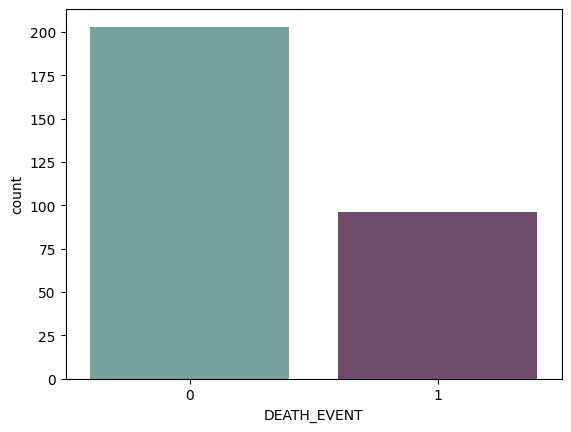

In [20]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x=data["DEATH_EVENT"],palette=cols)

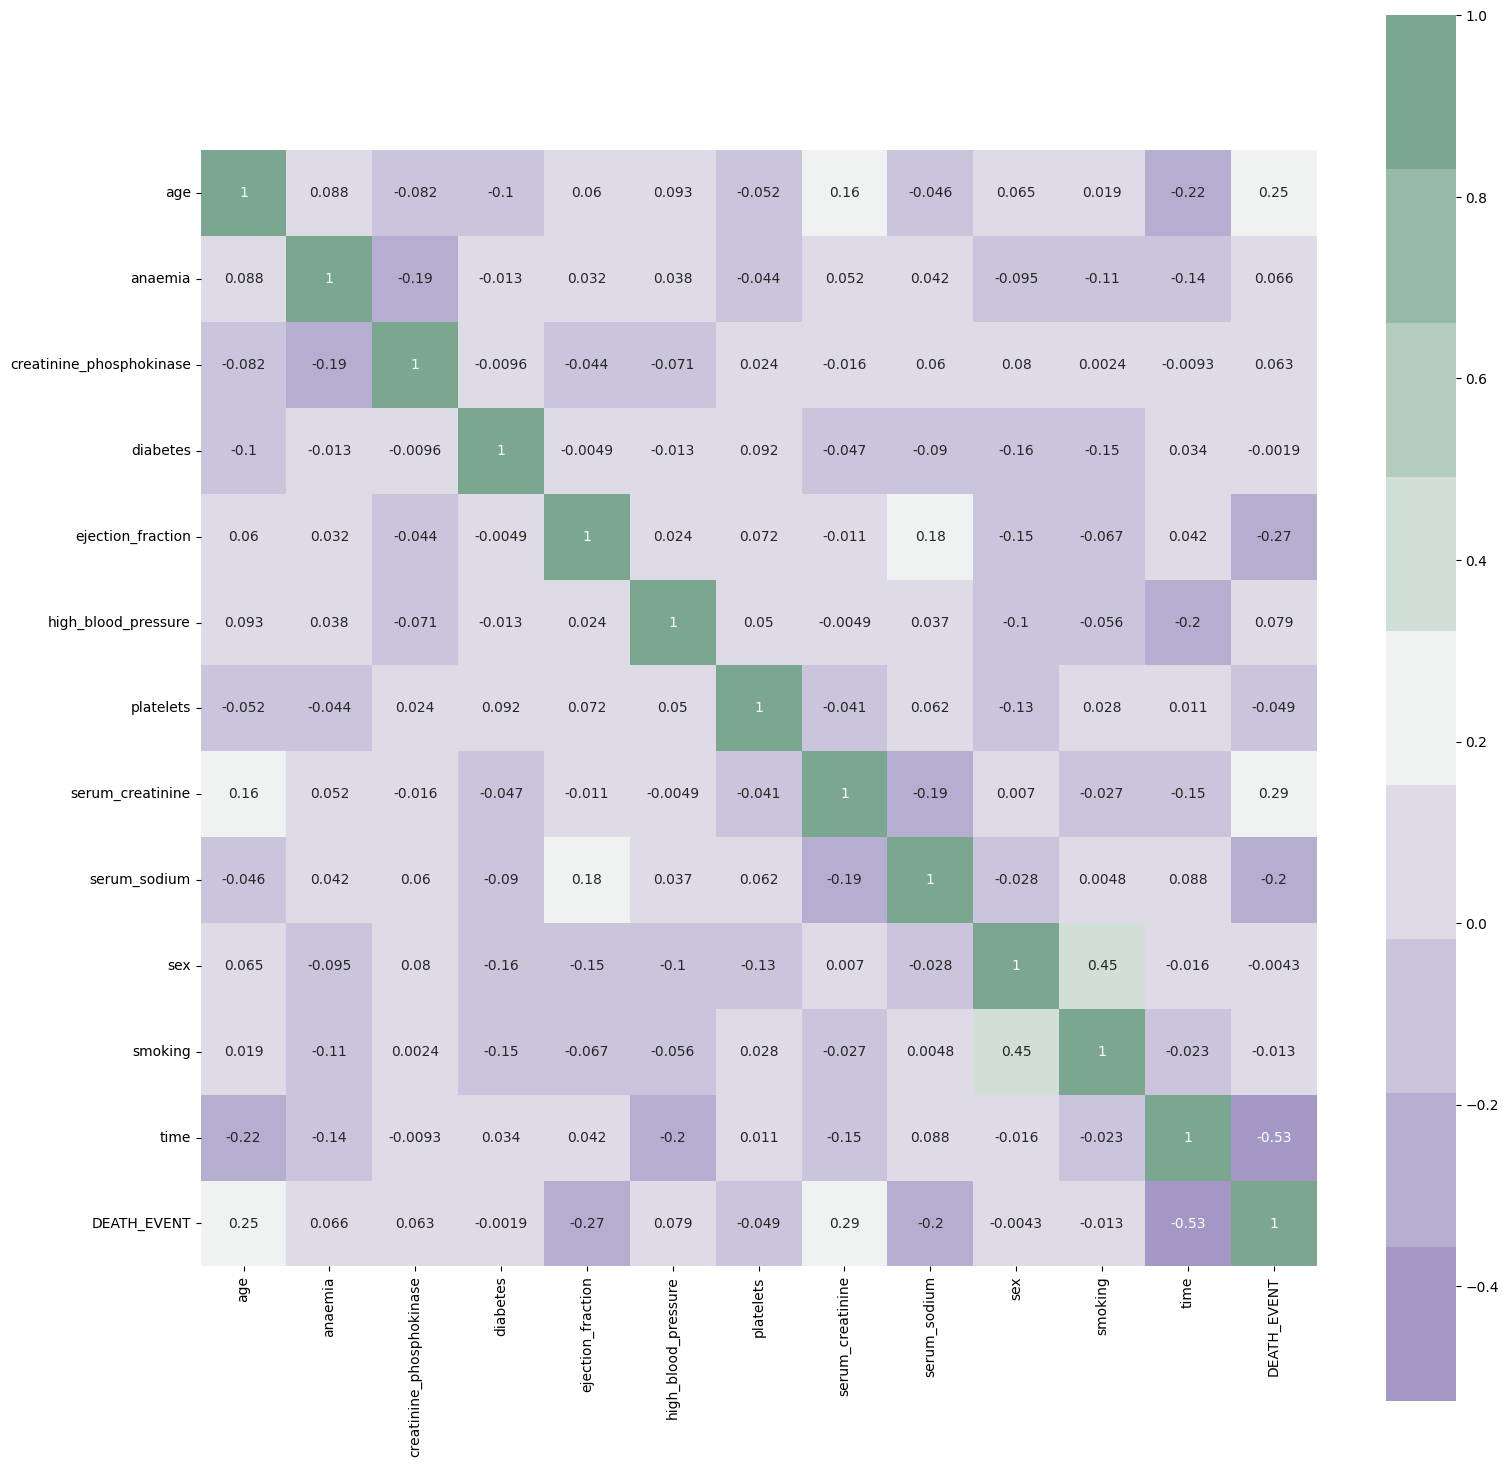

In [22]:
#examining the corelation matrix of all features
cmap= sns.diverging_palette(275,150, s=40,l=65, n=9)
corrmat= data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap=cmap,annot=True,square= True);

Text(0.5, 1.0, 'Distribution of Age')

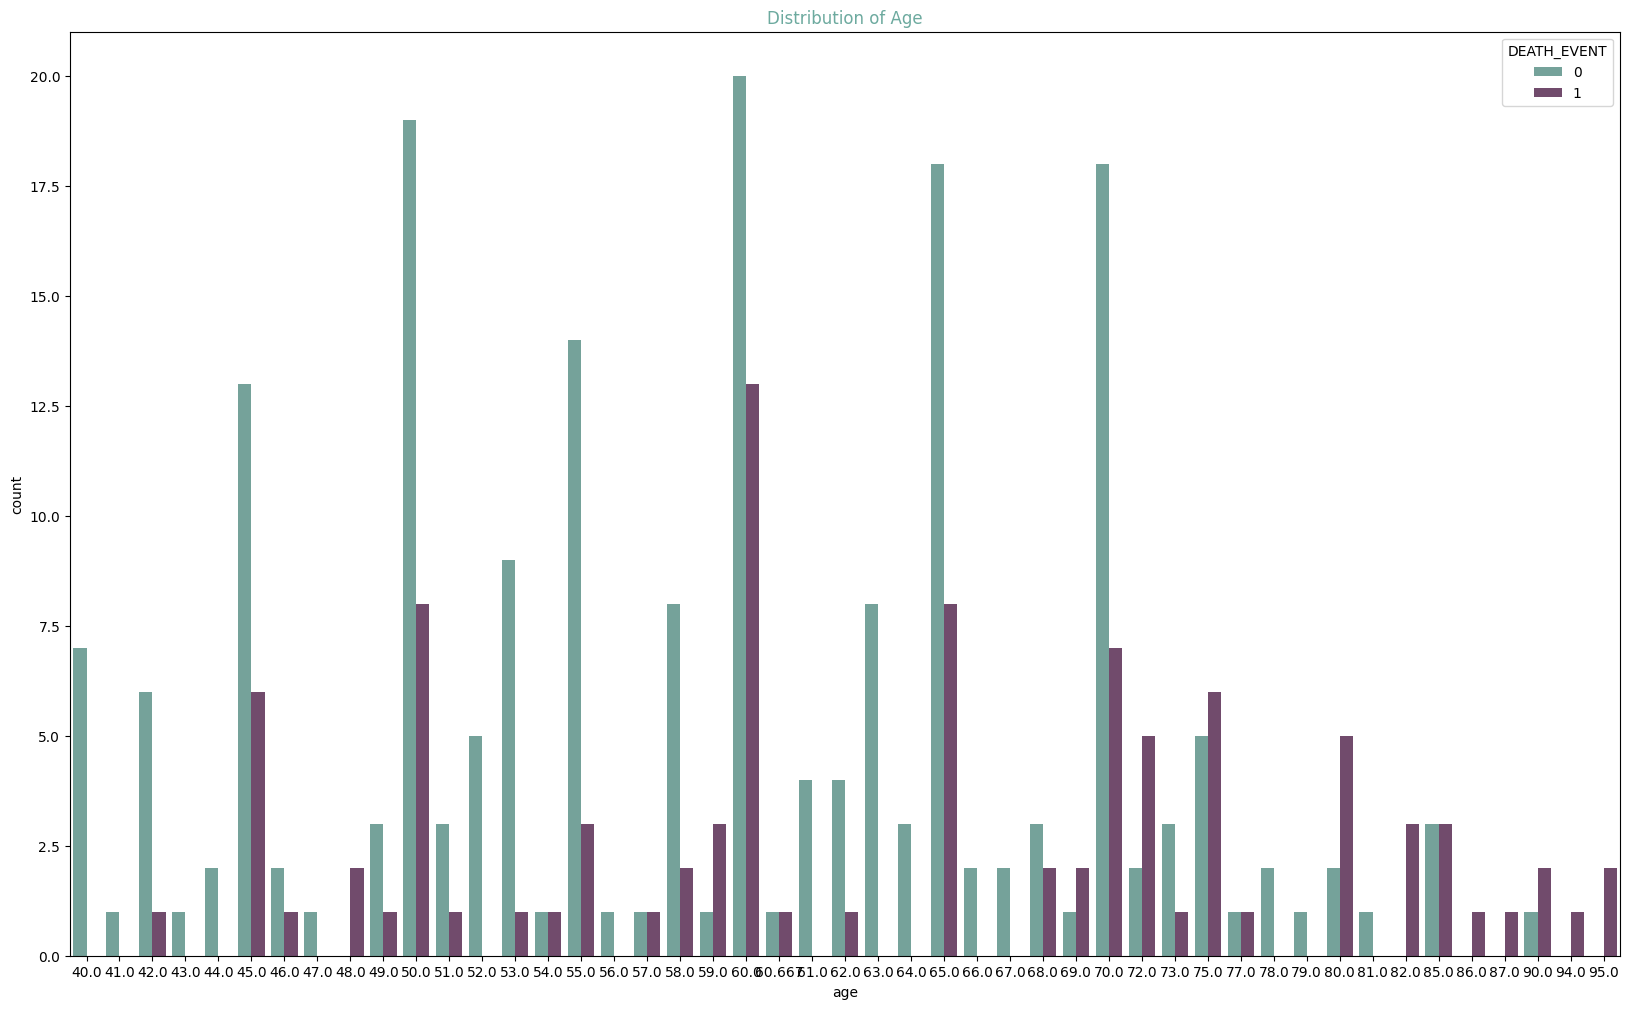

In [24]:
#evaluating age distribution
plt.figure(figsize=(20,12))
Days_week= sns.countplot(x=data["age"],data=data,hue="DEATH_EVENT",palette= cols)
Days_week.set_title("Distribution of Age",color= "#6daa9f")


In [26]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<ipython-input-29-b275c2086c1e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"],y=data[i],palette=cols)


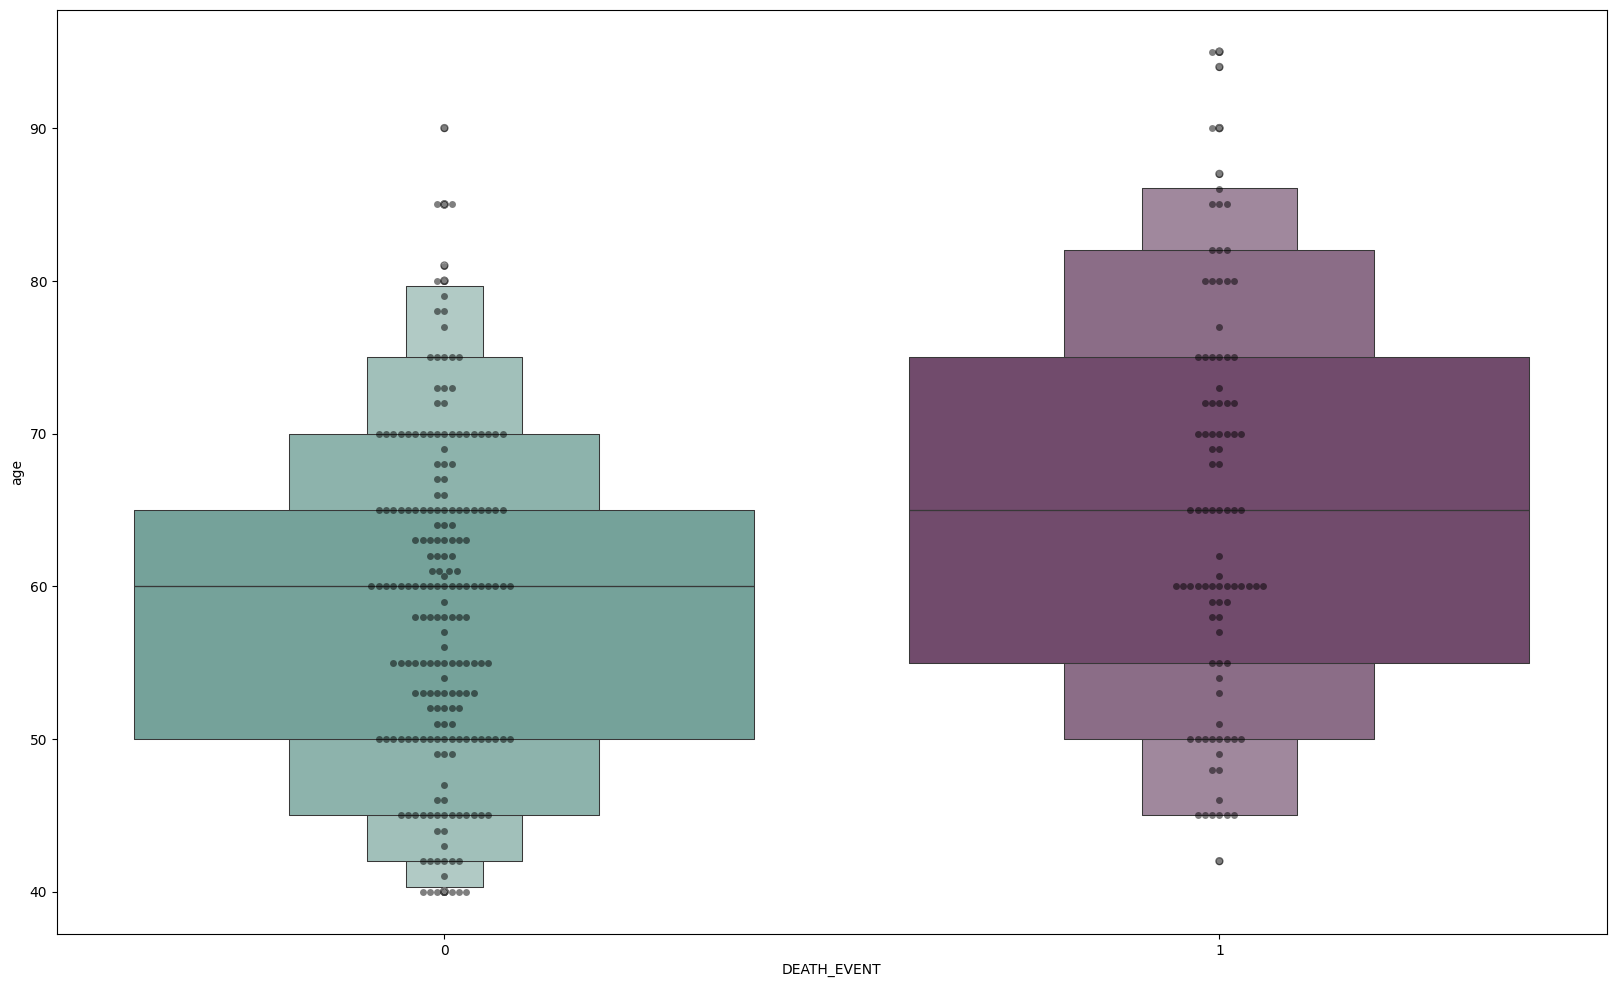

<ipython-input-29-b275c2086c1e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"],y=data[i],palette=cols)


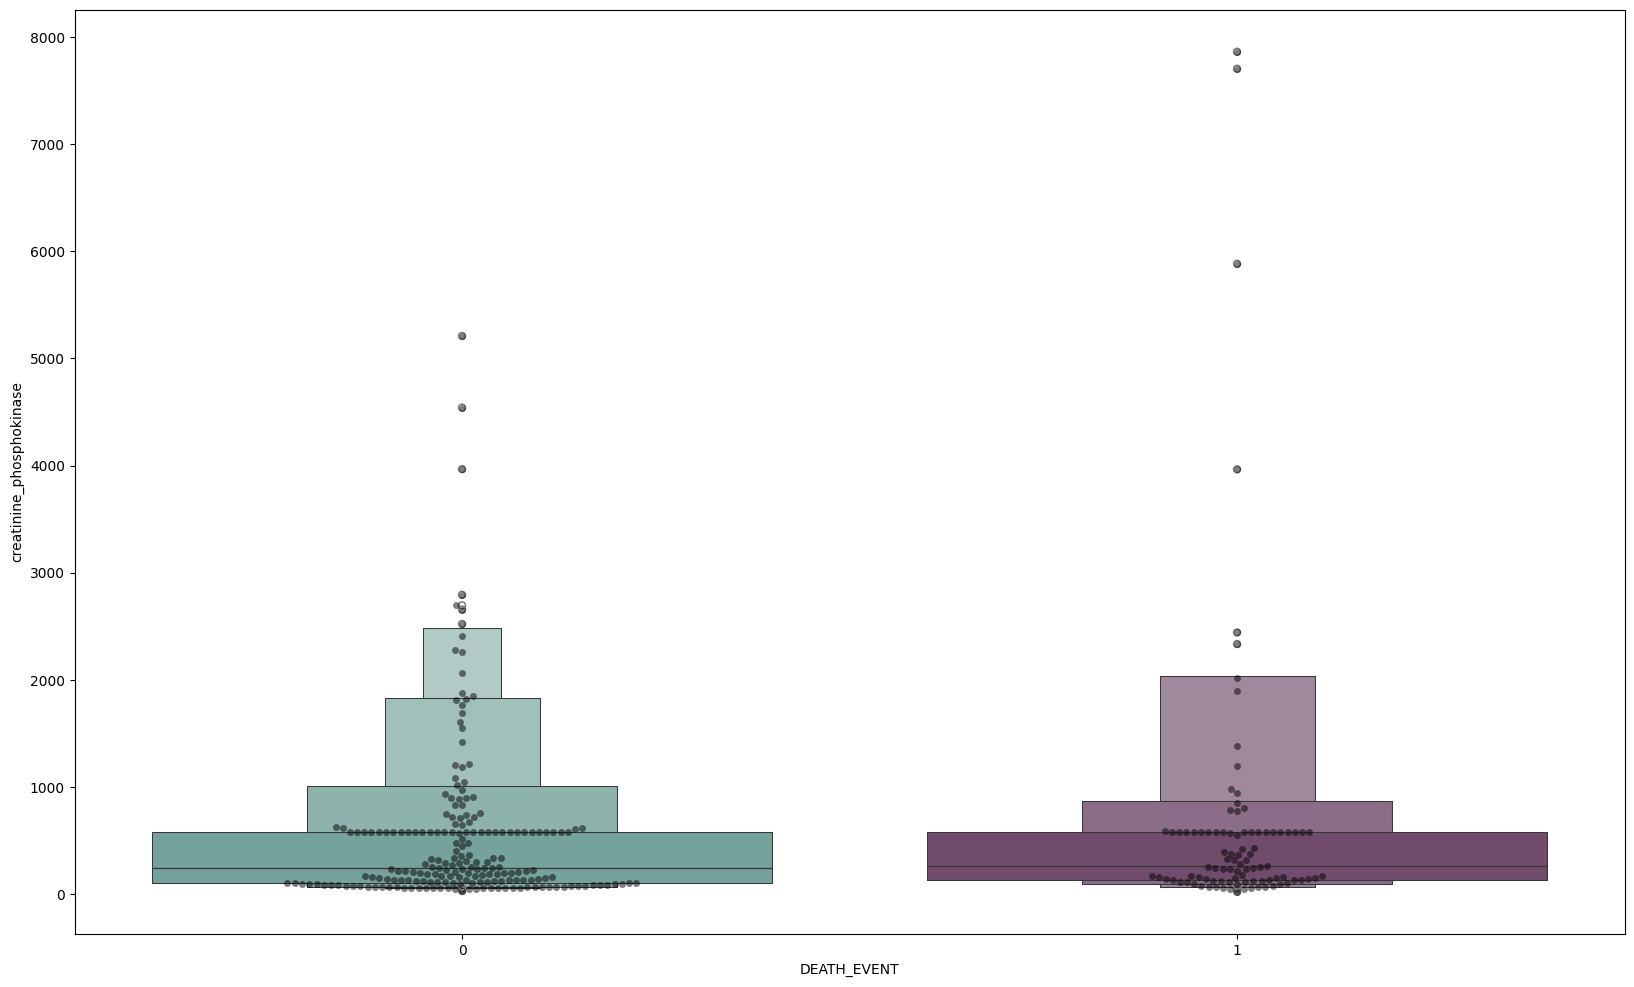

<ipython-input-29-b275c2086c1e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"],y=data[i],palette=cols)


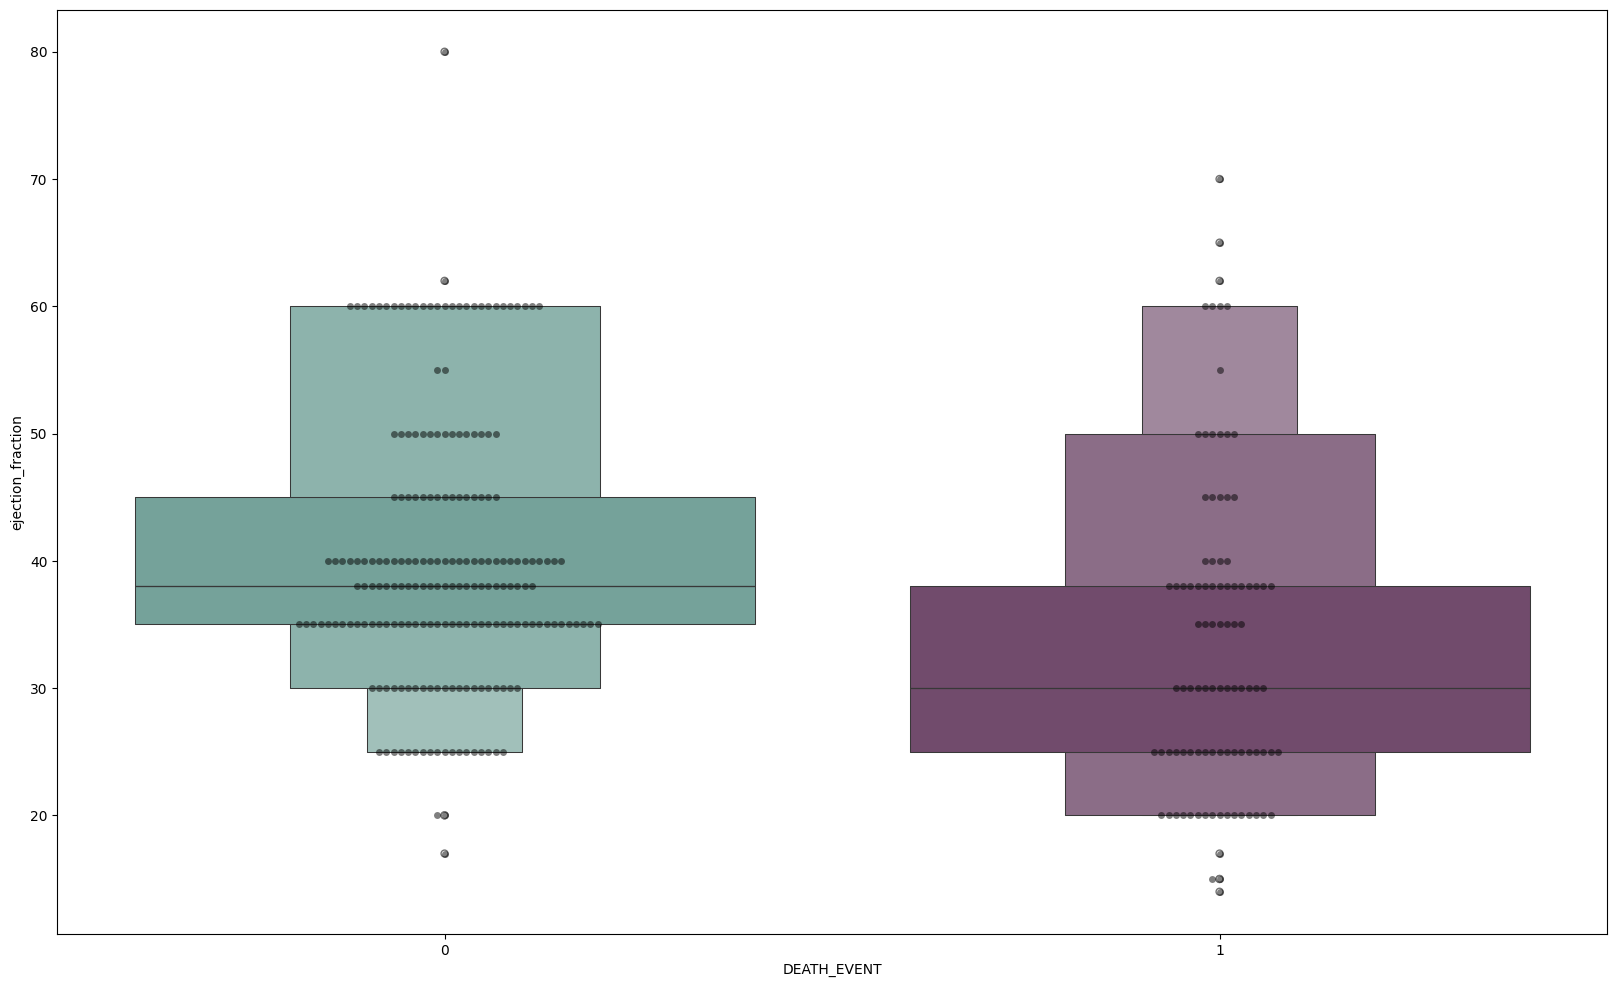

<ipython-input-29-b275c2086c1e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"],y=data[i],palette=cols)


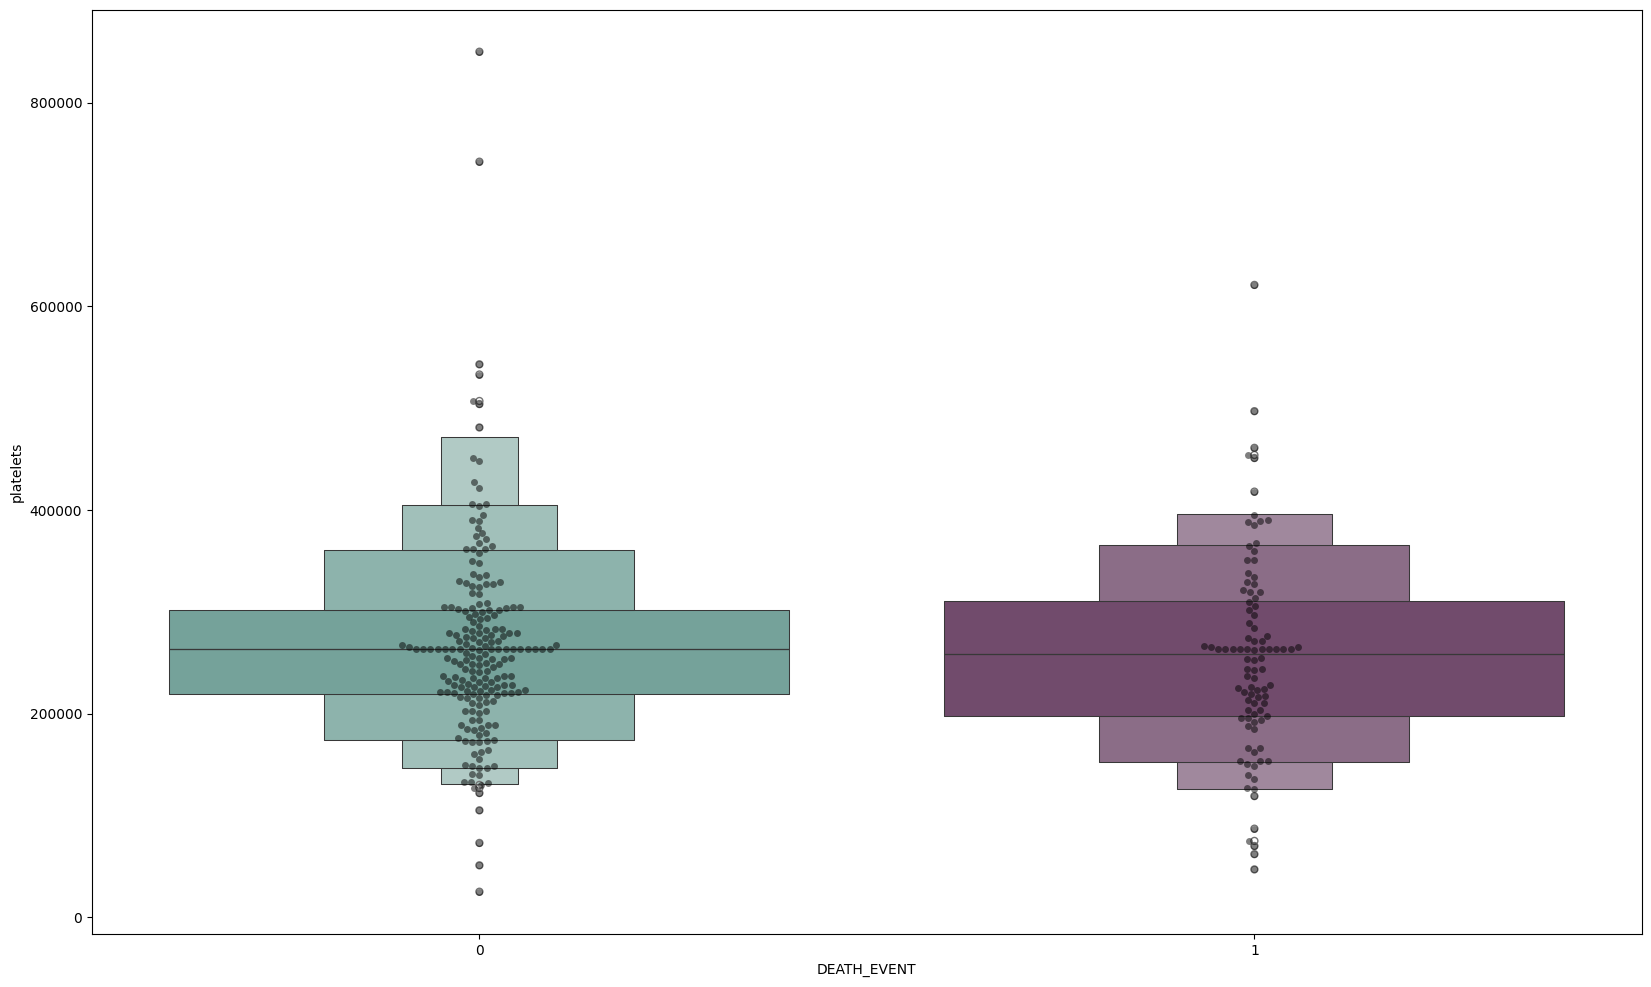

<ipython-input-29-b275c2086c1e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"],y=data[i],palette=cols)


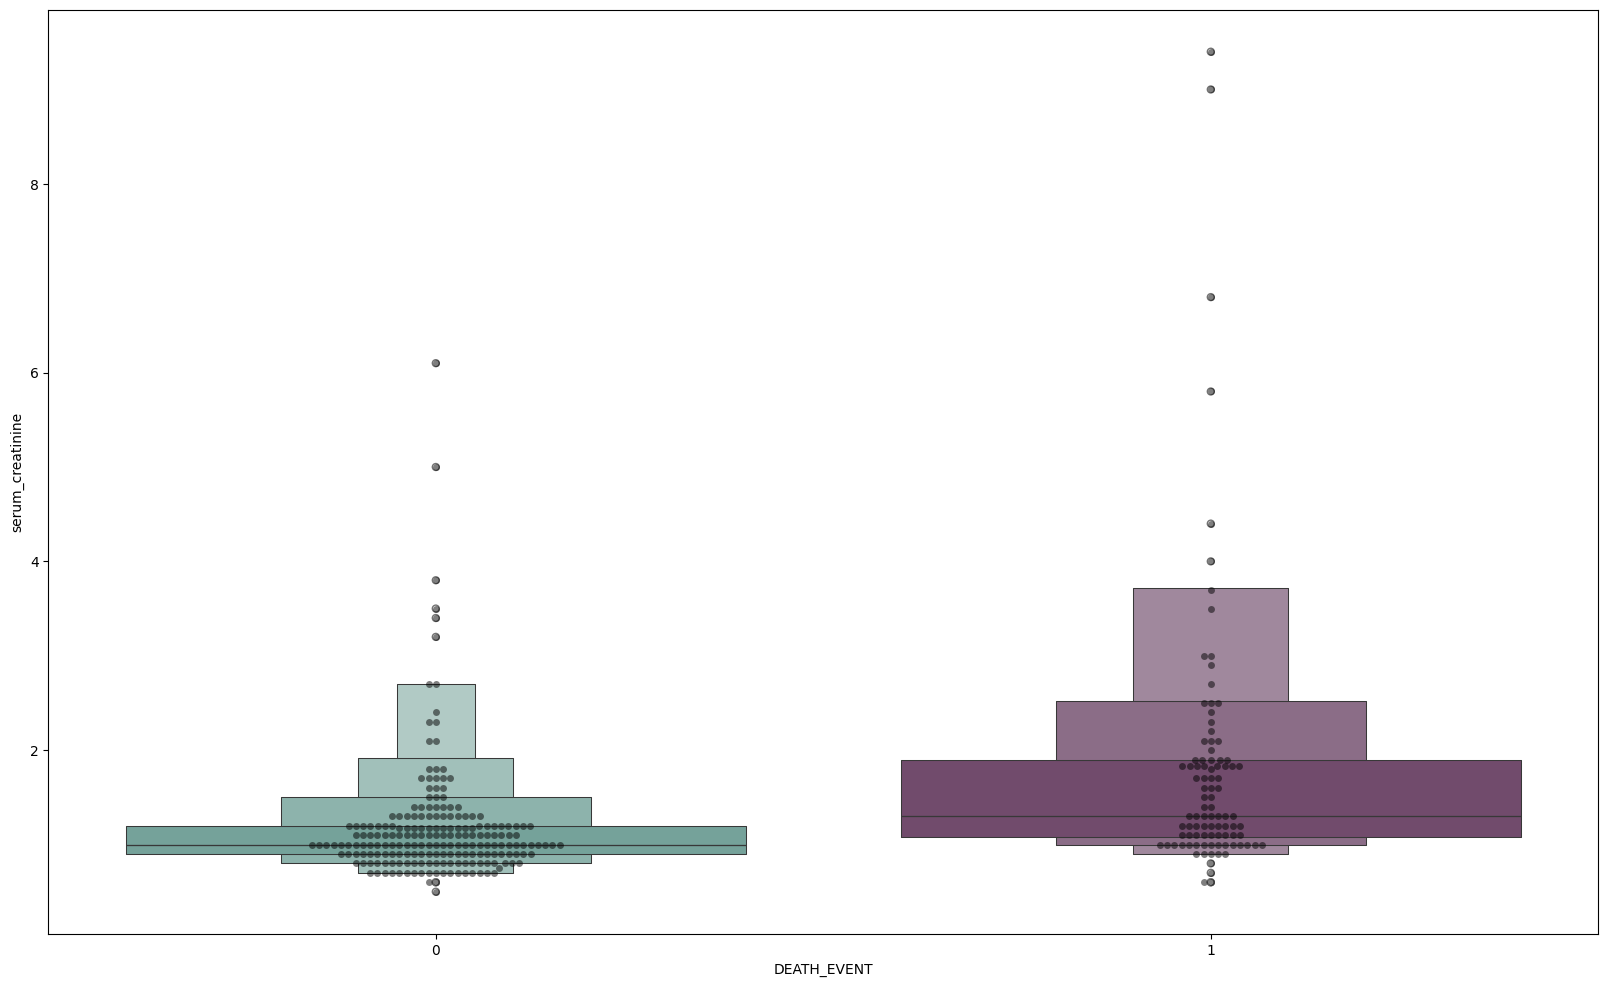

<ipython-input-29-b275c2086c1e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"],y=data[i],palette=cols)


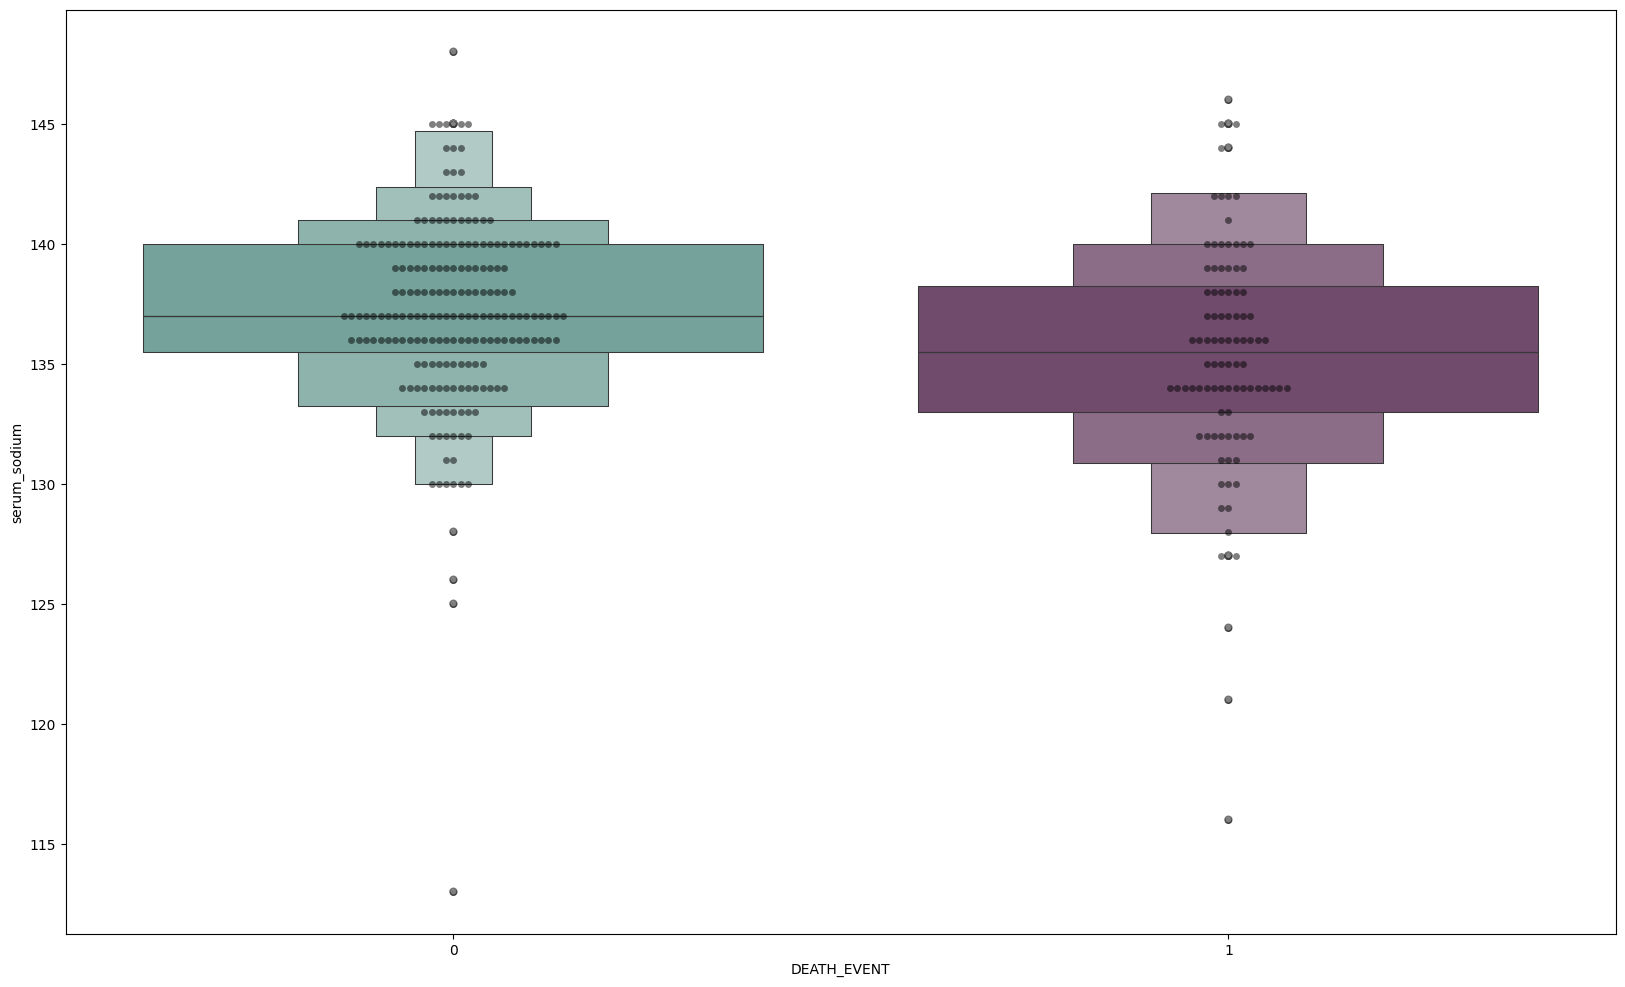

<ipython-input-29-b275c2086c1e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"],y=data[i],palette=cols)


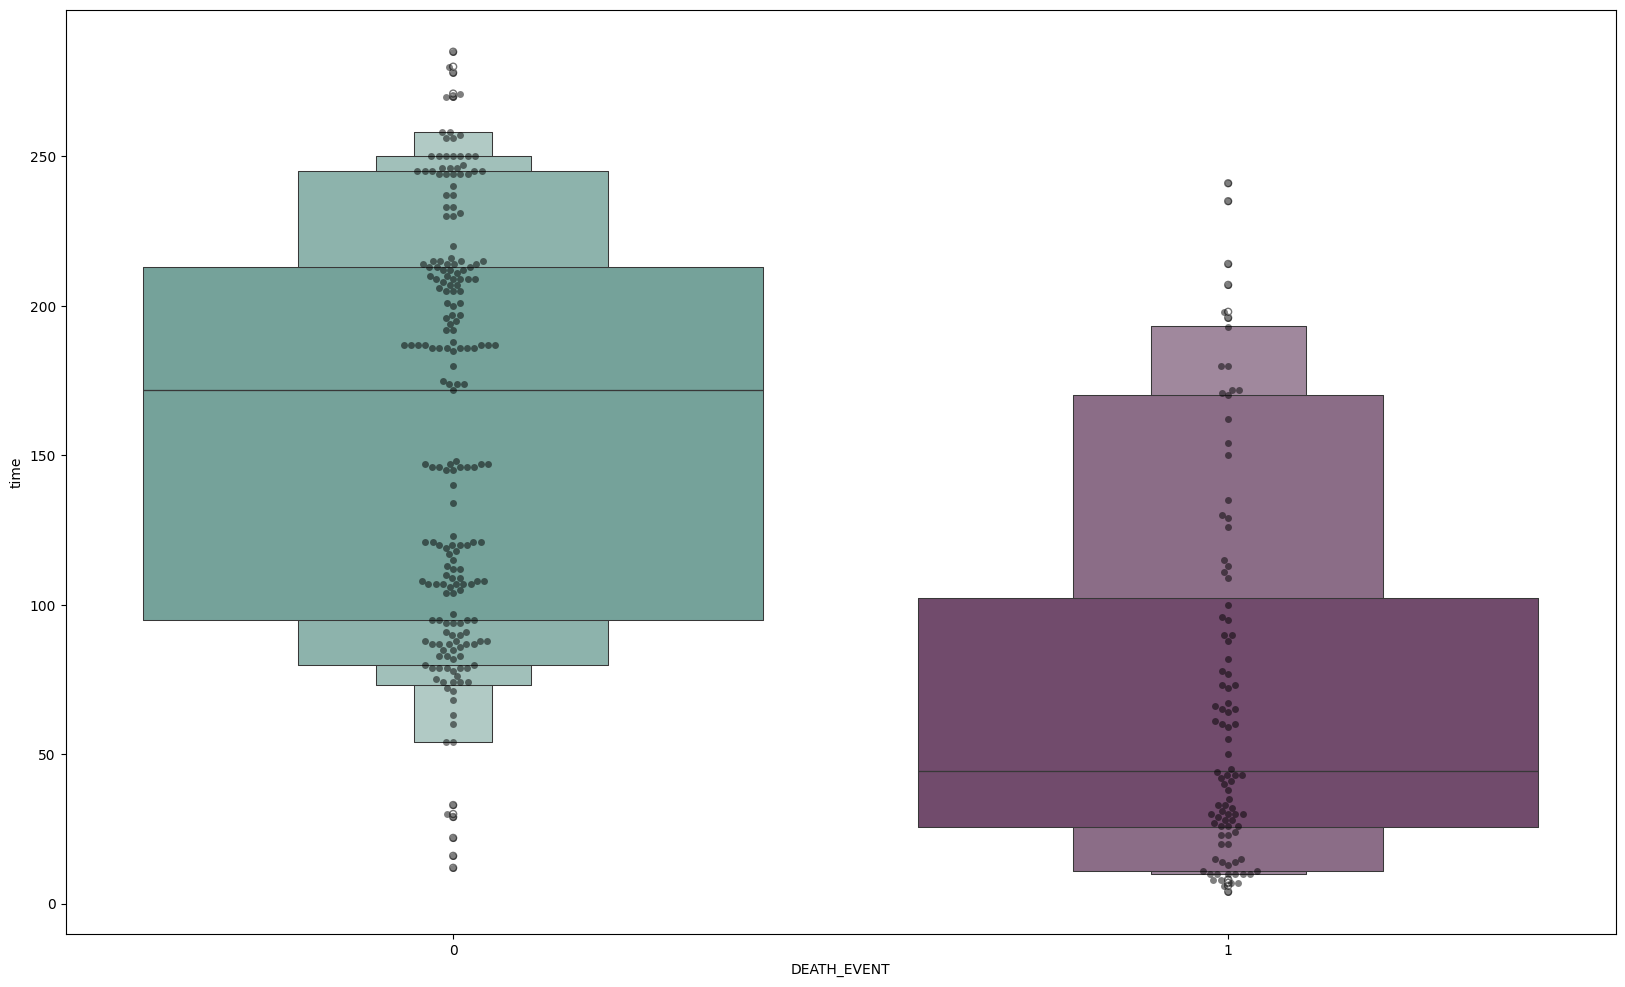

In [29]:
#boxen and swarn plot plot of some non binary features
feature=["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for i in feature:
  plt.figure(figsize=(20,12))
  sns.swarmplot(x=data["DEATH_EVENT"],y=data[i],color='black',alpha= 0.5)
  sns.boxenplot(x=data["DEATH_EVENT"],y=data[i],palette=cols)
  plt.show()

In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [35]:
#assigning values to features as X and target as Y
x= data.drop(["DEATH_EVENT"],axis=1)
y= data["DEATH_EVENT"]

In [44]:
#set up a standard scaler for the feature
col_names= list(x.columns)
s_scaler= preprocessing.StandardScaler()
x_df= s_scaler.fit_transform(x)
x_df= pd.DataFrame(x_df,columns= col_names)
x_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


<ipython-input-49-db58ff69e915>:4: UserWarning: 
The palette list has fewer values (5) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data= x_df,palette= colors)


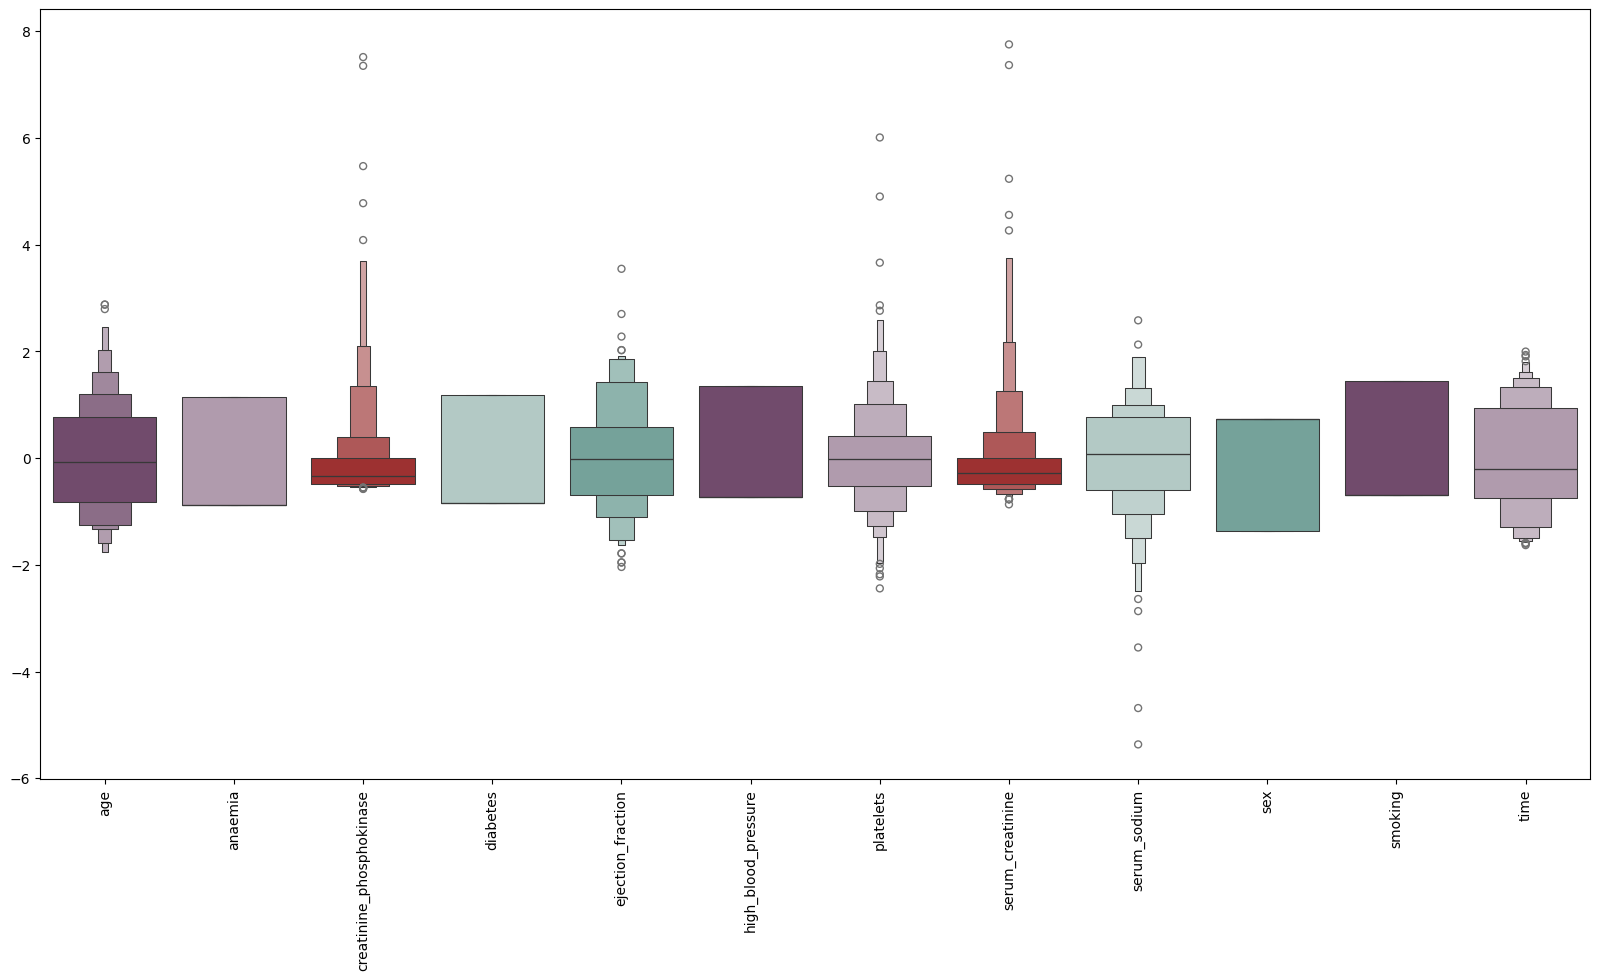

In [49]:
#looking at the scaled features
colors=["#774571","#b398af","#af1f1f","#afcdc7","#6daa9f"] # Removed an extra '1' from the third color
plt.figure(figsize=(20,10))
sns.boxenplot(data= x_df,palette= colors)
plt.xticks(rotation= 90)
plt.show()

In [56]:
#splitting train and test sets
x_train,x_test,y_train,y_test= train_test_split(x_df,y,test_size=0.2,random_state=42)

In [59]:
!pip install keras

In [58]:
!pip install tensorflow

In [62]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import confusion_matrix,confusion_matrix,classification_report,accuracy_score,f1_score

In [71]:
early_stopping= callbacks.EarlyStopping(
    min_delta= 0.001,
    patience= 20,
    restore_best_weights= True)
#initializing the Neural Network
model= Sequential()
model.add(Dense(units= 16, kernel_initializer= "uniform", activation= "relu",input_dim= 12)) #input layer
model.add(Dense(units= 8,kernel_initializer= "uniform",activation= "relu"))
model.add(Dropout(0.25))
model.add(Dense(units= 1,kernel_initializer= "uniform",activation= "sigmoid")) #output layer
from keras.optimizers import SGD
#compiling the ANN
model.compile(optimizer= "adam",loss= "binary_crossentropy",metrics= ["Accuracy"])
#train the ANN
history= model.fit(x_train,y_train,batch_size= 10,epochs= 500,callbacks= [early_stopping], validation_split= 0.2)

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - Accuracy: 0.6640 - loss: 0.6921 - val_Accuracy: 0.7500 - val_loss: 0.6879
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.6837 - loss: 0.6879 - val_Accuracy: 0.7500 - val_loss: 0.6811
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7038 - loss: 0.6801 - val_Accuracy: 0.7500 - val_loss: 0.6694
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.6722 - loss: 0.6718 - val_Accuracy: 0.7500 - val_loss: 0.6535
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7250 - loss: 0.6427 - val_Accuracy: 0.7500 - val_loss: 0.6224
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.7457 - loss: 0.5985 - val_Accuracy: 0.7500 - val_loss: 0.5763
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.6808 - loss: 0.5612 - val_Accuracy: 0.7500 - val_loss: 0.5312
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.6680 - loss: 0.5208 - val_Accuracy: 0.7500 - val_loss: 0.

In [70]:
val_accuracy= np.mean(history.history["val_Accuracy"])
print("\n%s: %.2f%%" %('val_Accuracy',val_accuracy*100))


val_Accuracy: 80.21%


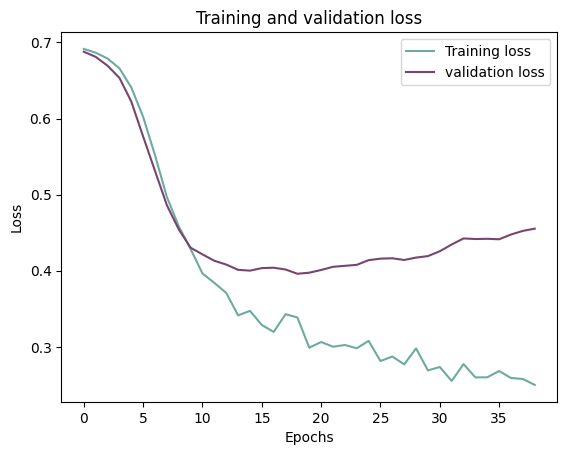

In [75]:
history_df= pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['loss']],'#6daa9f', label= 'Training loss')
plt.plot(history_df.loc[:,['val_loss']],'#774571', label= 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

In [77]:
#predicting the test set results
y_pred= model.predict(x_test)
y_pred= (y_pred>0.5)
np.set_printoptions()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


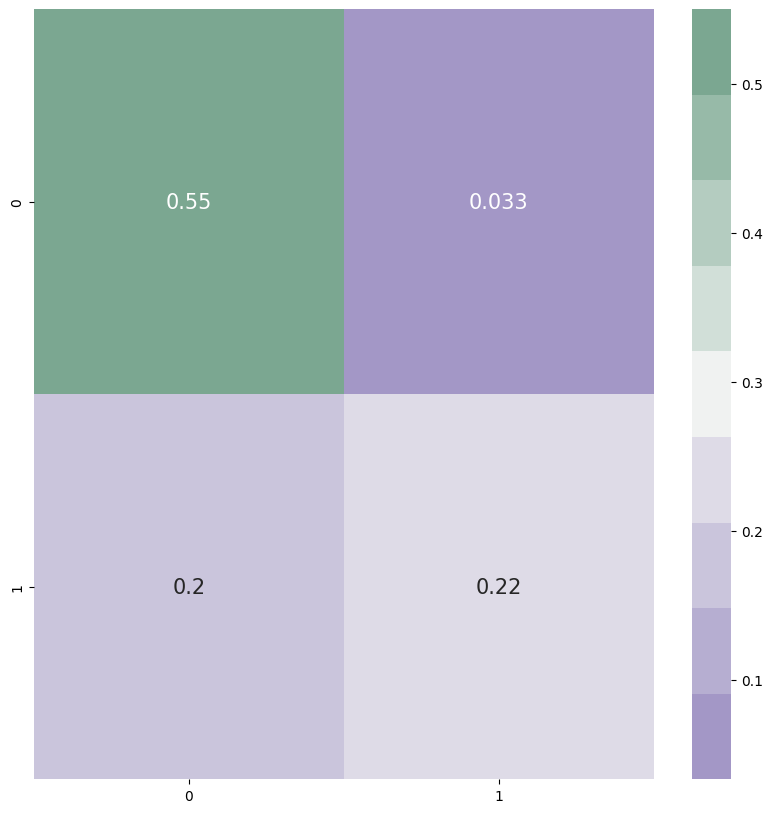

In [79]:
#confusion matrix
cmap1= sns.diverging_palette(275,150, s=40,l=65, n=9)
plt.subplots(figsize=(10,10))
cf_matrix= confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix),cmap= cmap1,annot= True,annot_kws={'size':15})
plt.show()

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.94      0.83        35
           1       0.87      0.52      0.65        25

    accuracy                           0.77        60
   macro avg       0.80      0.73      0.74        60
weighted avg       0.79      0.77      0.75        60

